In [3]:
import pandas as pd
import numpy as np

# Data : 1 'House Rental Data'

### 1. Load rental data with first column as index column (Solved)

In [57]:
house_rental = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')
house_rental.sample(5)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
319,1700.724,13,21,2,2,2,55000
361,2383.860,2,7,3,2,2,70000
538,711.600,5,7,2,2,1,43000
564,1423.200,11,12,2,2,2,38000
262,1515.708,2,7,2,2,2,49800


In [3]:
house_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
Sqft           645 non-null float64
Floor          645 non-null int64
TotalFloor     645 non-null int64
Bedroom        645 non-null int64
Living.Room    645 non-null int64
Bathroom       645 non-null int64
Price          645 non-null int64
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [4]:
house_rental.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


### 2. Find all houses which has more than 2 bedroom and price less than 50k

In [8]:
house_rental[(house_rental.Bedroom > 2) & (house_rental.Price < 50000)]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
9,1152.792,10,12,3,2,2,45000
13,1352.040,9,19,4,2,2,39000
20,1174.140,3,9,3,2,1,33000
...,...,...,...,...,...,...,...
634,1167.024,2,12,3,2,2,38000
635,996.240,3,5,3,1,1,28000
640,1266.648,6,7,3,2,2,40000
644,1359.156,7,15,3,2,2,45000


### 3. Find all houses which has more than 3 bedroom and price less than 50k. Update their price with 60k

In [10]:
def f(house_rental):
    if (house_rental.Bedroom > 3) & (house_rental.Price < 50000):
        return 60000
    else:
        return house_rental.Price


house_rental["new_price"] = house_rental.apply(f,axis = 1)

In [11]:
house_rental[house_rental.Price != house_rental.new_price]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,new_price
13,1352.040,9,19,4,2,2,39000,60000.0
62,889.500,2,4,4,1,1,32000,60000.0
78,1522.824,5,12,4,2,2,40000,60000.0
81,1558.404,5,7,4,2,2,48800,60000.0
137,1921.320,4,7,4,2,2,48000,60000.0
146,1245.300,5,6,4,2,2,39000,60000.0
173,1921.320,4,7,4,2,2,48000,60000.0
182,1487.244,6,7,4,2,2,33700,60000.0
189,1287.996,4,5,4,2,2,30000,60000.0
273,1366.272,4,11,4,2,2,49999,60000.0


### 4. Find no of house who's price is updated in previous question.

In [14]:
len(house_rental[house_rental.Price != house_rental.new_price])

23

### 5. Find average price of house.

In [15]:
house_rental.Price.mean()

61986.82325581396

###  6. Find average price of house respective to bedroom.
example : avg price of house of 1 bedroom then 2 ...so on

In [70]:
 house_rental.groupby(['Bedroom']).Price.mean()

Bedroom
1     35549.086957
2     47131.689441
3     65030.949791
4     77745.434783
5    117000.000000
6    180000.000000
7    180000.000000
Name: Price, dtype: float64

### 7. Find details of house whose price is highest.

In [17]:
house_rental[house_rental.Price == house_rental.Price.max()]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,new_price
289,3504.63,13,14,2,2,2,250000,250000.0


### 8. Sort the given data by price in ascending order

In [23]:
house_rental.sort_values("Price", ascending = True )

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,new_price
613,996.24,4,5,3,2,1,6100,6100.0
408,604.86,5,5,2,0,1,11900,11900.0
624,711.60,1,1,3,1,1,12000,12000.0
375,426.96,9,12,1,0,1,13000,13000.0
276,533.70,7,12,1,1,1,17000,17000.0
...,...,...,...,...,...,...,...,...
27,3664.74,19,19,3,2,3,200000,200000.0
473,3842.64,15,16,3,1,2,200000,200000.0
303,3664.74,9,13,5,1,2,206000,206000.0
149,4981.20,3,38,3,2,3,225000,225000.0


### 9. Display all details of house with 1 bedroom first then 2 bedroom.. and so on.
Note use Groupby then describe

In [72]:
house_rental.sort_values(by='Bedroom').groupby('Bedroom').describe()

Sqft                                                         \
         count         mean         std       min       25%       50%   
Bedroom                                                                 
1         69.0   704.896522  325.237204   359.358   523.026   640.440   
2        161.0  1095.090522  498.594814   434.076   740.064   925.080   
3        239.0  1675.862661  730.002273   651.114  1184.814  1458.780   
4        161.0  1945.916609  502.503797   857.478  1572.636  1889.298   
5         13.0  2808.630462  795.128143  1579.752  2312.700  2700.522   
6          1.0  5856.468000         NaN  5856.468  5856.468  5856.468   
7          1.0  4198.440000         NaN  4198.440  4198.440  4198.440   

                             Floor             ... Bathroom       Price  \
              75%       max  count       mean  ...      75%  max  count   
Bedroom                                        ...                        
1         782.760  2134.800   69.0   6.304348  ...      1.0  3.0   69.0   
2        1423.200  3558.000  161.0   6.024845  ...      2.0  3.0  161.0   
3        1908.867  5760.402  239.0   5.640167  ...      2.0  4.0  239.0   
4        2138.358  3255.570  161.0   5.689441  ...      2.0  5.0  161.0   
5        3202.200  4643.190   13.0  10.769231  ...      4.0  4.0   13.0   
6        5856.468  5856.468    1.0   7.000000  ...      5.0  5.0    1.0   
7        4198.440  4198.440    1.0  15.000000  ...      4.0  4.0    1.0   

                                                                              \
                  mean           std       min       25%       50%       75%   
Bedroom                                                                        
1         35549.086957  11101.949542   13000.0   26000.0   35000.0   43000.0   
2         47131.689441  23138.981748   11900.0   35000.0   43500.0   55000.0   
3         65030.949791  39100.727939    6100.0   40000.0   50000.0   78500.0   
4         77745.434783  29222.749760   30000.0   55000.0   73000.0   98000.0   
5        117000.000000  50071.615379   55000.0   80000.0  100000.0  145000.0   
6        180000.000000           NaN  180000.0  180000.0  180000.0  180000.0   
7        180000.000000           NaN  180000.0  180000.0  180000.0  180000.0   

                   
              max  
Bedroom            
1         67000.0  
2        250000.0  
3        225000.0  
4        160000.0  
5        206000.0  
6        180000.0  
7        180000.0  

[7 rows x 48 columns]

### 10. Display all details of each house with 1 bedroom first then 2 bedroom.. and so on.

In [74]:
house_rental.sort_values(by='Bedroom')

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
349,370.032,4,7,1,1,1,24888
432,925.080,2,18,1,2,1,51000
241,789.876,7,9,1,1,1,42000
423,469.656,7,7,1,1,1,34000
248,1106.538,3,12,1,2,1,50000
...,...,...,...,...,...,...,...
331,2892.654,19,21,5,3,4,170000
360,2312.700,7,16,5,2,3,55000
303,3664.740,9,13,5,1,2,206000
576,5856.468,7,21,6,2,5,180000


# Data : 2 'Health Care Data'

## Load rental data with first column as index column (Solved)

In [4]:
# link -- > https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/HealthCareData-1.xlsx
# click on view raw it will download file automatically in your system then you this file as syntax below
hc_df = pd.read_excel('F:\EdYoda\Machine Learning\Pandas\HealthCareData-1.xlsx')
hc_df.sample(5)

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
97,98,68,male,rural,38,2,both,negative,negative,YES,...,NaN,NaN,2.5,4.1,0.6,160.0,98,46,YES,YES
899,900,43,male,urban,20,2,both,negative,negative,YES,...,NaN,3.4,2.5,4.1,0.6,180.0,94,46,YES,YES
555,556,55,female,NaN,20,2,country liquor,Positive,Positive,NO,...,1.5,5.0,2.5,2.5,01:01:00,152.0,172,180,YES,YES
590,591,62,female,NaN,30,1,both,negative,negative,NO,...,2.0,5.0,1.2,3.8,NaN,121.0,154,158,YES,YES
60,61,38,male,urban,10,2,country liquor,negative,negative,YES,...,2.0,5.0,1.2,3.8,0.31,116.0,77,40,YES,NaN


In [28]:
hc_df.sample(5)

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
814,815,55,male,urban,30,2,country liquor,negative,negative,YES,...,2.3,4.2,1.8,2.6,NaN,150.0,61,46,YES,YES
93,94,68,male,rural,38,2,both,negative,negative,YES,...,NaN,NaN,2.5,4.1,0.6,160.0,98,46,YES,YES
694,695,62,male,NaN,30,3,branded liquor,negative,negative,YES,...,3.6,3.0,2.0,1.0,02:01:00,114.0,70,72,YES,YES
301,302,46,male,rural,18,2,country liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,115.0,68,35,YES,YES
104,105,46,male,urban,12,2,country liquor,negative,negative,YES,...,1.0,8.0,5.0,3.0,1.66,130.0,110,90,YES,YES


In [39]:
hc_df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.498557,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.712546,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,4.000000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


In [41]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
S.NO                                                                       950 non-null int64
Age                                                                        950 non-null int64
Gender                                                                     950 non-null object
Place(location where the patient lives)                                    816 non-null object
Duration of alcohol consumption(years)                                     950 non-null int64
Quantity of alcohol consumption (quarters/day)                             950 non-null int64
Type of alcohol consumed                                                   950 non-null object
Hepatitis B infection                                                      950 non-null object
Hepatitis C infection                                                      950 non-null object
Diabetes Result                             

### 1. Display all the information respective to gender.

In [38]:
hc_df.Gender.describe()

count      950
unique       4
top       male
freq       739
Name: Gender, dtype: object

### 2. Find all the male who is consuming alcohal more than 5 years and has diabetes result positive.

In [54]:
hc_df[(hc_df.Gender == 'male') & (hc_df['Duration of alcohol consumption(years)'] >5) & (hc_df['Diabetes Result'] == 'YES')].head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
5,6,55,male,urban,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
6,7,55,male,urban,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


### 3. Find where more people consume alcohol in rural or urban?

In [73]:
print('urban count :',(hc_df['Place(location where the patient lives)'] == 'urban').value_counts())
print('rural count :',(hc_df['Place(location where the patient lives)'] == 'rural').value_counts())

urban count : False    588
True     362
Name: Place(location where the patient lives), dtype: int64
rural count : False    497
True     453
Name: Place(location where the patient lives), dtype: int64


### 4. Find average age of male and female who consume alcohol.

In [71]:
print("male age avg",hc_df[hc_df['Gender'] == 'male'].Age.mean())
print("female age avg",hc_df[hc_df['Gender'] == 'female'].Age.mean())

male age avg 50.115020297699594
female age avg 52.54358974358974


### 5. Display distribution for different type of alcohol.

In [47]:
import matplotlib.pyplot as plt

(array([183.,   0.,   0., 288.,   0.,   0., 478.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

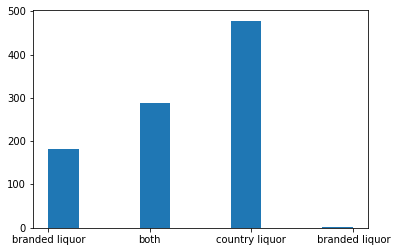

In [49]:

plt.hist(hc_df['Type of alcohol consumed'])

### 6. Display average age of perople who has diabetes positive.

In [53]:
hc_df[hc_df['Diabetes Result'] == 'YES'].Age.mean()

50.68006182380216

(array([647.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 303.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

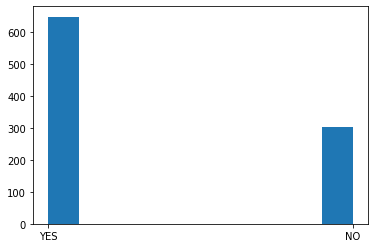

In [55]:
plt.hist(hc_df['Diabetes Result'])

### 7. Find is there any missing value of age in given data.

In [41]:
hc_df[hc_df.Age.isnull()]

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)


### 8. If gender is male and age is less than 35 then change diabetes result to NO .

In [32]:
hc_df[(hc_df.Gender == 'male') & (hc_df['Age'] < 35) & (hc_df['Diabetes Result'] == 'NO')]

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)


### 9. Find all record where Place is missing.

In [6]:
hc_df[pd.isnull(hc_df['Place(location where the patient lives)'])].sample(10)

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
628,629,52,female,NaN,25,2,branded liquor,Positive,Positive,YES,...,2.5,3.0,1.2,2.8,NaN,180.0,200,106,YES,YES
396,397,52,male,NaN,30,2,country liquor,negative,negative,YES,...,2.4,4.0,2.0,2.0,01:01:00,111.0,104,74,YES,NaN
422,423,38,female,NaN,16,1,country liquor,negative,negative,NO,...,1.0,5.0,3.0,2.0,NaN,96.0,90,60,YES,YES
587,588,62,male,NaN,28,2,country liquor,negative,negative,NO,...,3.0,5.0,3.0,2.0,1.5:1,98.0,126,76,YES,YES
406,407,48,male,NaN,25,3,branded liquor,negative,negative,NO,...,2.4,4.0,2.0,2.0,01:01:00,111.0,104,76,YES,NaN
565,566,46,male,NaN,22,2,branded liquor,negative,negative,NO,...,1.8,5.0,2.0,3.0,0.6:1,100.0,96,94,YES,YES
585,586,46,male,NaN,22,2,both,negative,negative,YES,...,1.8,5.0,2.0,3.0,0.6:1,100.0,96,94,YES,YES
297,298,46,male,NaN,16,2,country liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,115.0,68,35,YES,YES
245,246,42,male,NaN,20,1,country liquor,negative,negative,YES,...,1.3,6.8,3.0,3.8,0.78,122.0,96,34,YES,YES
375,376,56,female,NaN,32,1,country liquor,Positive,Positive,NO,...,2.0,6.4,1.9,4.6,00:01:02.200000,206.0,142,116,YES,NaN


### 10. Change place to urban if gender is female else rural.

In [44]:
def f(hc_df):
    if hc_df.Gender == 'female':
        return 'urban'
    else:
        return hc_df['Place(location where the patient lives)']


hc_df['new place'] = hc_df.apply(f, axis =1)

In [45]:
hc_df.sample(10)

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not),new place
711,712,46,male,rural,18,2,country liquor,Positive,Positive,YES,...,6.0,4.0,2.0,02:01:00,180.0,84,96,YES,YES,rural
704,705,46,male,rural,18,2,country liquor,negative,negative,YES,...,6.0,4.0,2.0,02:01:00,180.0,84,96,YES,YES,rural
326,327,57,male,rural,27,2,country liquor,negative,negative,NO,...,7.6,5.4,2.2,2.45,137.0,66,58,YES,YES,rural
16,17,45,male,urban,15,3,both,negative,negative,NO,...,NaN,2.3,4.0,0.575,139.0,56,48,YES,YES,urban
804,805,48,male,NaN,20,2,branded liquor,Positive,Positive,NO,...,5.0,2.5,2.5,01:01:00,124.0,110,70,YES,NaN,NaN
223,224,38,male,urban,10,3,both,negative,negative,YES,...,6.6,7.7,3.5,2.2,146.0,56,43,YES,YES,urban
580,581,36,female,urban,16,2,country liquor,negative,negative,NO,...,7.1,2.0,5.1,01:03:00,76.0,59,48,YES,YES,urban
641,642,42,male,urban,15,2,branded liquor,Positive,Positive,NO,...,4.0,3.0,1.0,1900-01-03 00:00:00,110.0,70,40,YES,YES,urban
490,491,62,female,rural,30,1,both,negative,negative,YES,...,5.0,1.2,3.8,NaN,121.0,154,158,YES,YES,urban
457,458,78,female,rural,40,4,country liquor,negative,negative,YES,...,6.0,3.2,2.8,NaN,160.0,75,82,YES,YES,urban
